In [1]:
# numpy is used here for binning method 
import numpy as np
# pandas library used here for inspection of dataset

# matplotlib is used to visualize the data

import pandas as pd

# matplotlib is used to visualize the data

import matplotlib.pyplot as plt
#seaborn is also  used for visualize the data
import seaborn as sns
import scipy.stats as stats
import math as math
#sklearn for creating the model

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import metrics


# decision tree and random forest classifier for predicting the output
from sklearn.tree import DecisionTreeClassifier

#confusion matrix for accuracy
from IPython.display import Image
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix



from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


%matplotlib inline
sns.set(color_codes=True)

# Importing dataset and explore

In [2]:
data=pd.read_csv('Data - Parkinsons.csv')

In [3]:
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [4]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
shape_data=data.shape
print('The shape of the dataframe is',shape_data,'which means there are',shape_data[0],'rows of voice recordings and',shape_data[1],'attributes of patients.')

The shape of the dataframe is (195, 24) which means there are 195 rows of voice recordings and 24 attributes of patients.


In [6]:
dupes=data.duplicated()
print(' The number of duplicates in the dataset are:',sum(dupes),'\n','Hence, it is quite evident that there are no duplicates in the dataset')

 The number of duplicates in the dataset are: 0 
 Hence, it is quite evident that there are no duplicates in the dataset


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
cname=data.columns
data_desc=data.describe().T
data_desc['Skewness']=round(data[cname].skew(),4)
pd.DataFrame(data_desc)

,count,mean,std,min,25%,50%,75%,max,Skewness
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000,0.5917
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000,2.5421
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000,1.2174
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160,3.0849
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260,2.6491
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440,3.3607
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580,3.0739
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330,3.3621
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080,1.6665
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000,1.9994


# Visualization of data

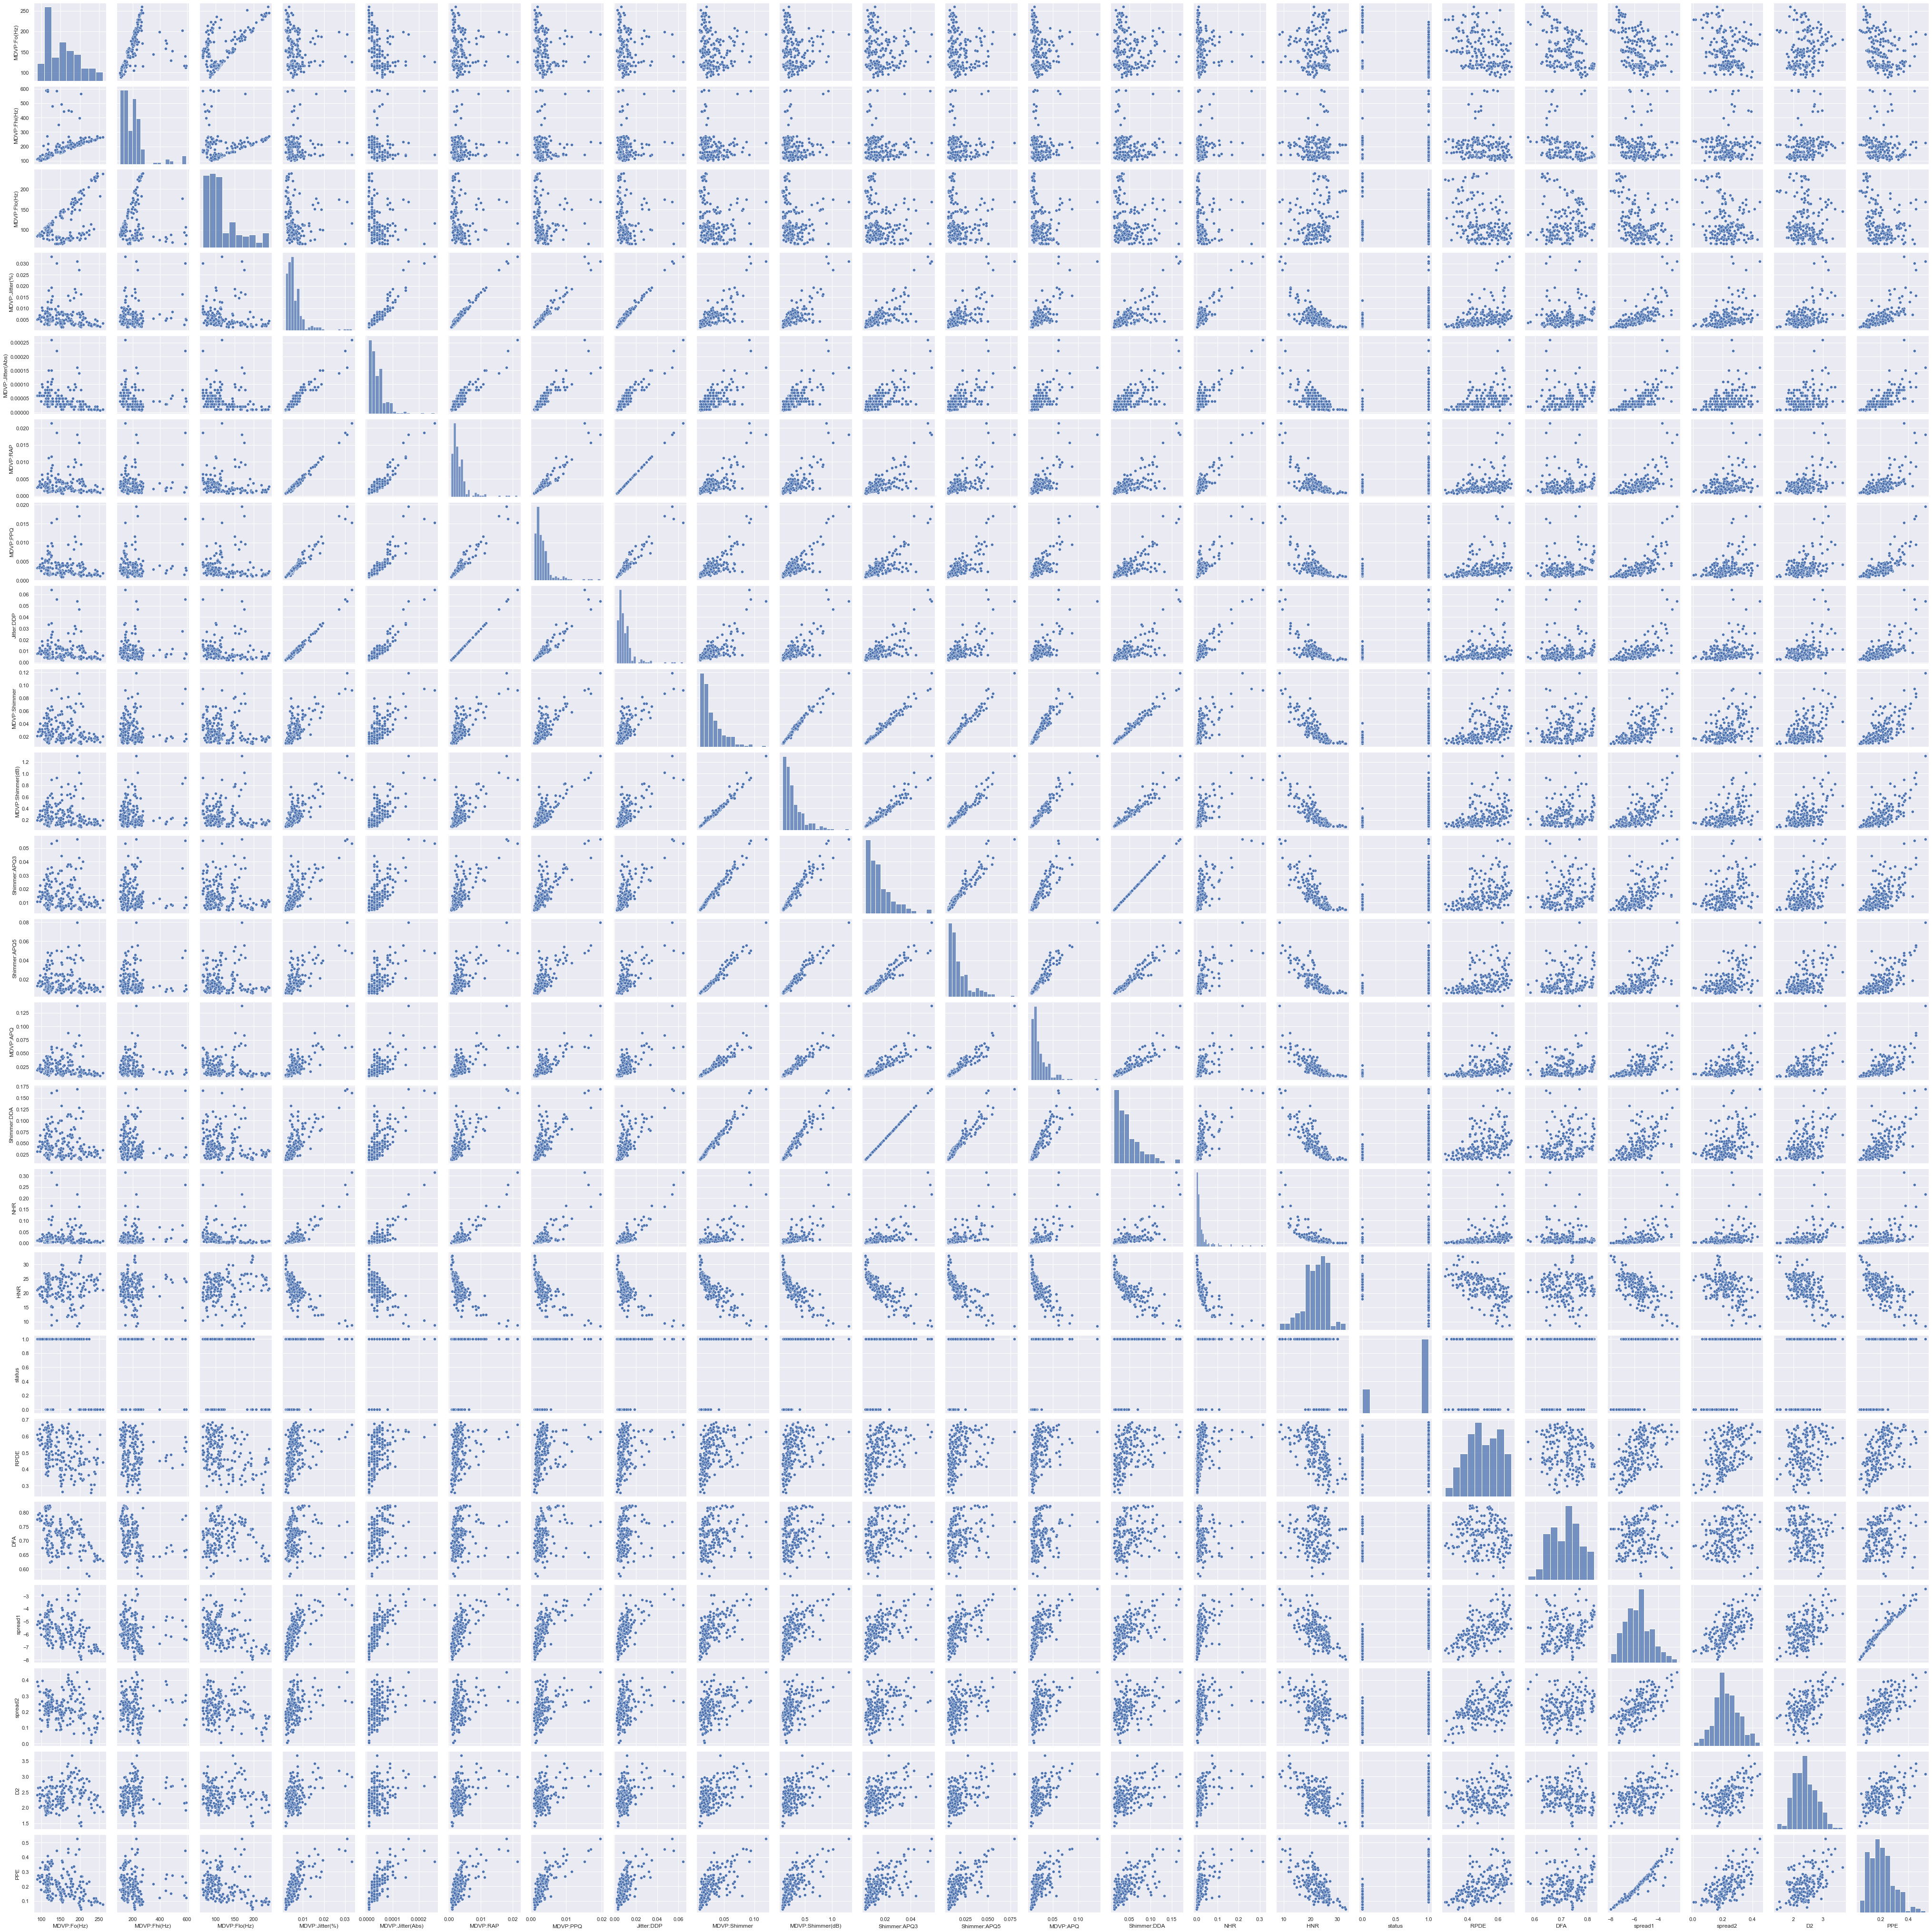

In [9]:
usecols =[i for i in data.columns if i != ['name','status']]
sns.pairplot(data[usecols]);

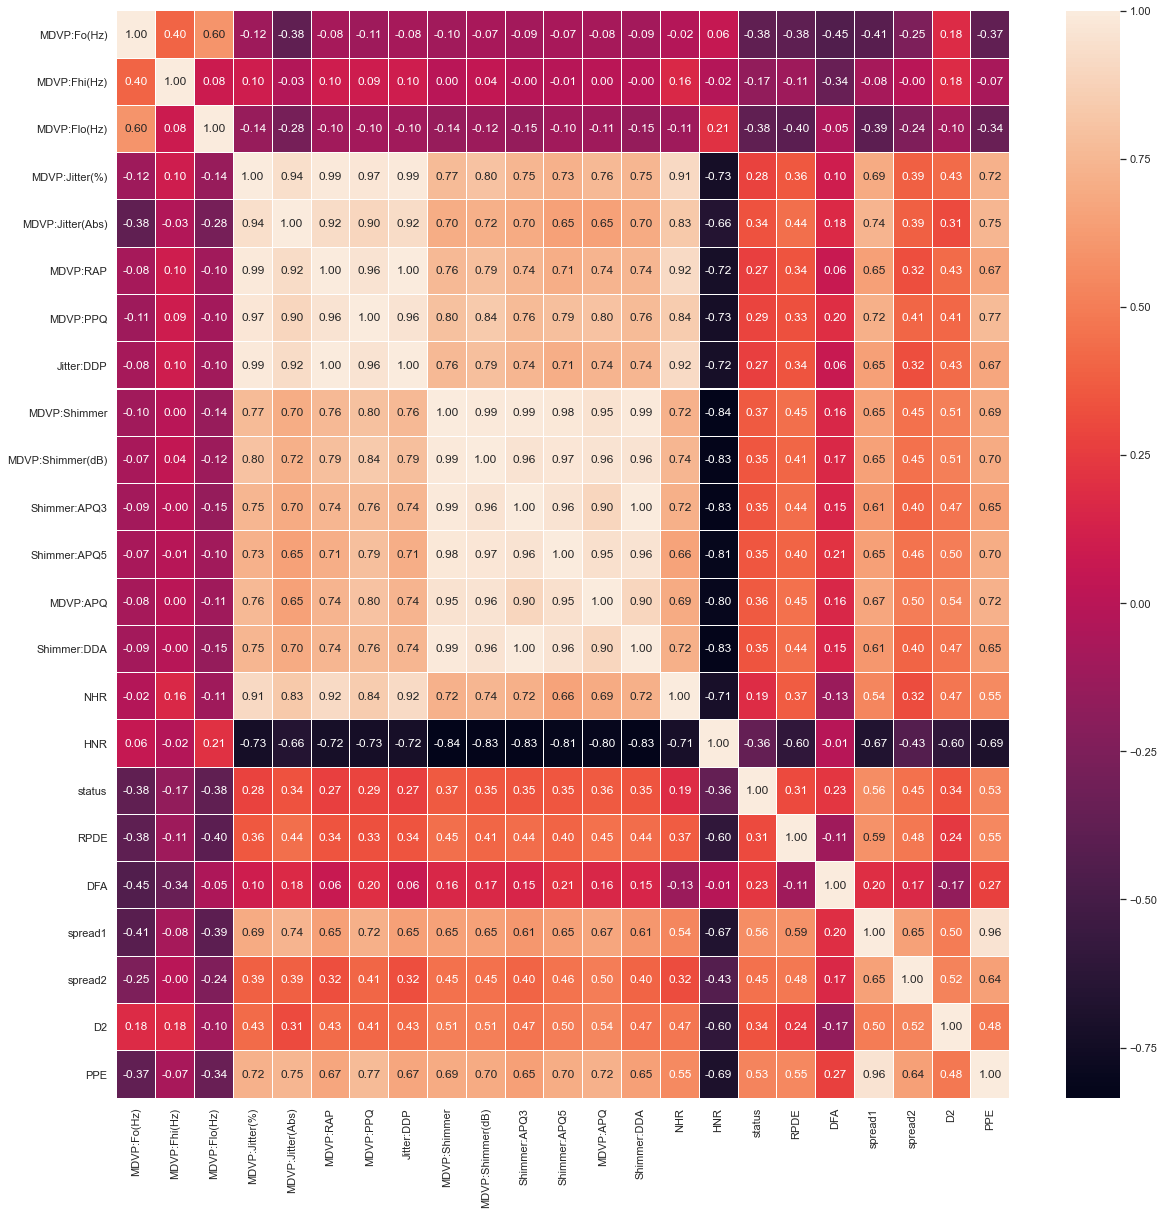

In [10]:
corr=data[usecols].corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr,annot=True,linewidth=0.05,ax=ax, fmt= '.2f');

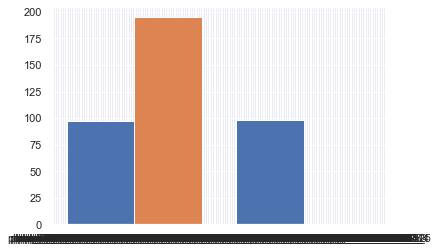

In [11]:
np.random.seed(456)
x = (data['name'], data['status'])
plt.hist(x, bins = 2)
plt.show()

In [12]:
udata=data.drop('name',axis=1)
udata.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [13]:
Atr1g2='MDVP:Fo(Hz)'
Atr2g2='MDVP:Fhi(Hz)'
Atr3g2='MDVP:Flo(Hz)'

In [14]:
Atr1g2_5pt=udata.describe().loc[['min','25%','50%','75%','max'],[Atr1g2]]
Atr2g2_5pt=udata.describe().loc[['min','25%','50%','75%','max'],[Atr2g2]]
Atr3g2_5pt=udata.describe().loc[['min','25%','50%','75%','max'],[Atr3g2]]

summ_g2 = pd.concat([Atr1g2_5pt,Atr2g2_5pt,Atr3g2_5pt],axis=1,sort=False)

print('The 5 point summary of attributes in group 2 are:','\n','\n',summ_g2)

The 5 point summary of attributes in group 2 are: 
 
      MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)
min       88.333      102.1450       65.4760
25%      117.572      134.8625       84.2910
50%      148.790      175.8290      104.3150
75%      182.769      224.2055      140.0185
max      260.105      592.0300      239.1700


# Outliers detection

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='MDVP:Flo(Hz)'>

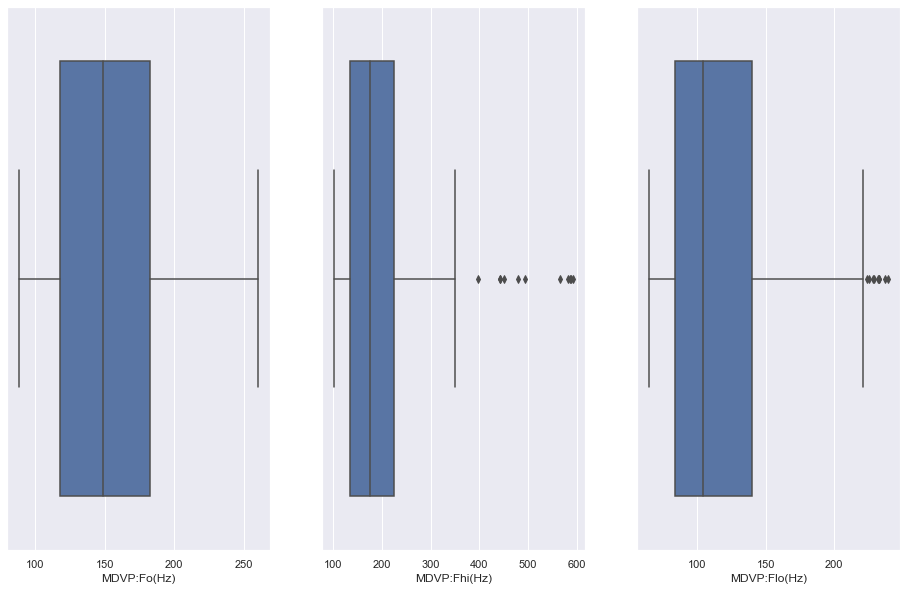

In [15]:
fig, ax = plt.subplots(1,3,figsize=(16,10)) 
sns.boxplot(x=Atr1g2,data=udata, ax=ax[0],orient='v') 
sns.boxplot(x=Atr2g2,data=udata, ax=ax[1],orient='v')
sns.boxplot(x=Atr3g2,data=udata,ax=ax[2],orient='v')

# Creation of the model

In [16]:
pdata=udata.copy()

In [17]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [18]:
calc_vif(round(pdata,2))

C:\Users\admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,MDVP:Fo(Hz),53.518297
1,MDVP:Fhi(Hz),8.795329
2,MDVP:Flo(Hz),17.257065
3,MDVP:Jitter(%),7.607233
4,MDVP:Jitter(Abs),NaN
5,MDVP:RAP,6.262228
6,MDVP:PPQ,6.428414
7,Jitter:DDP,17.730525
8,MDVP:Shimmer,127.969986
9,MDVP:Shimmer(dB),179.950644


In [19]:
pdata=pdata.drop(['DFA','MDVP:Jitter(Abs)','status'],axis=1)

In [20]:
calc_vif(round(pdata,2))

,variables,VIF
0,MDVP:Fo(Hz),43.626409
1,MDVP:Fhi(Hz),8.414154
2,MDVP:Flo(Hz),16.429654
3,MDVP:Jitter(%),7.287722
4,MDVP:RAP,6.188621
5,MDVP:PPQ,6.264600
6,Jitter:DDP,17.151583
7,MDVP:Shimmer,127.960825
8,MDVP:Shimmer(dB),176.304571
9,Shimmer:APQ3,50.830237


In [21]:
pdata=pdata.drop(['MDVP:Shimmer(dB)','spread1','MDVP:Shimmer','D2','Shimmer:DDA','RPDE','Shimmer:APQ5','MDVP:Fo(Hz)',
                  'PPE','HNR','Shimmer:APQ3','Jitter:DDP'],axis=1)

In [22]:
calc_vif(round(pdata,2))

,variables,VIF
0,MDVP:Fhi(Hz),5.269247
1,MDVP:Flo(Hz),5.313824
2,MDVP:Jitter(%),4.680998
3,MDVP:RAP,4.362311
4,MDVP:PPQ,3.948684
5,MDVP:APQ,7.240203
6,NHR,5.278017
7,spread2,8.244022


# Train and test split

In [23]:
# lets build our classification model
# independent variables
X = pdata
# X=pd.DataFrame(X_stand1)
# the dependent variable
y = udata['status']

In [24]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [25]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(pdata.index)) * 100))

69.74% data is in training set
30.26% data is in test set


In [26]:
y_train_yPD=y_train[y_train==1].count()
y_train_nPD=y_train[y_train==0].count()
y_test_yPD=y_test[y_test==1].count()
y_test_nPD=y_test[y_test==0].count()

print("In the original dataset people who had parkinson Dieases    : {0} ({1:0.2f}%)".format(len(pdata.loc[udata['status'] == 1]), (len(pdata.loc[udata['status'] == 1])/len(pdata.index)) * 100))
print("In the original dataset people who didnot have Parkinson Disease   : {0} ({1:0.2f}%)".format(len(pdata.loc[udata['status'] == 0]), (len(pdata.loc[udata['status'] == 0])/len(pdata.index)) * 100))
print("")
print("In the training dataset people who who had parkinson Dieases    : {0} ({1:0.2f}%)".format(y_train_yPD, (y_train_yPD/len(y_train))*100))
print("In the training dataset people who didnot have Parkinson Disease    : {0} ({1:0.2f}%)".format(y_train_nPD, (y_train_nPD/len(y_train))*100))
print("")
print("In the test dataset people who who had parkinson Dieases    : {0} ({1:0.2f}%)".format(y_test_yPD, (y_test_yPD/len(y_test))*100))
print("In the test dataset people who didnot have Parkinson Disease    : {0} ({1:0.2f}%)".format(y_test_nPD, (y_test_nPD/len(y_test))*100))

In the original dataset people who had parkinson Dieases    : 147 (75.38%)
In the original dataset people who didnot have Parkinson Disease   : 48 (24.62%)

In the training dataset people who who had parkinson Dieases    : 107 (78.68%)
In the training dataset people who didnot have Parkinson Disease    : 29 (21.32%)

In the test dataset people who who had parkinson Dieases    : 40 (67.80%)
In the test dataset people who didnot have Parkinson Disease    : 19 (32.20%)


In [27]:
# lets create a copy of the train and test data for scaling
X_Train_stand = X_train.copy()
X_Test_stand = X_test.copy()

# Scaling the data

In [28]:
# we will use standard scaler for scaling the data.
scale = StandardScaler().fit(X_Train_stand)

In [29]:
X_train= scale.transform(X_Train_stand)
X_test= scale.transform(X_Test_stand)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [31]:
X_train.shape, X_test.shape

((130, 8), (65, 8))

#  Random Forest Classifier model

In [32]:

from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [34]:
y_pred = rfc.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9385


In [36]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)

In [37]:
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9385


# Decision tree classifier model

In [38]:

from sklearn.tree import DecisionTreeClassifier

In [39]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [40]:
y_pred_gini = clf_gini.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8000


[Text(446.40000000000003, 380.52, 'X[1] <= 180.185\ngini = 0.363\nsamples = 130\nvalue = [31, 99]'),
 Text(334.8, 271.8, 'X[5] <= 0.02\ngini = 0.27\nsamples = 118\nvalue = [19, 99]'),
 Text(223.20000000000002, 163.07999999999998, 'X[0] <= 235.247\ngini = 0.417\nsamples = 64\nvalue = [19, 45]'),
 Text(111.60000000000001, 54.360000000000014, 'gini = 0.346\nsamples = 54\nvalue = [12, 42]'),
 Text(334.8, 54.360000000000014, 'gini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(446.40000000000003, 163.07999999999998, 'gini = 0.0\nsamples = 54\nvalue = [0, 54]'),
 Text(558.0, 271.8, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]')]

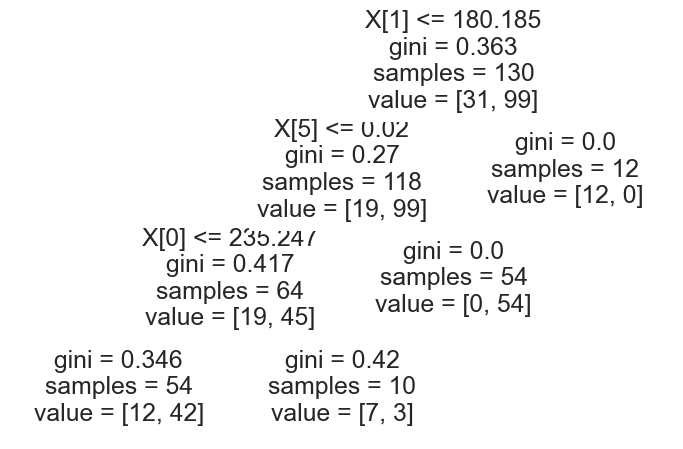

In [42]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 